En este notebook la parte del proyecto que se desarrolla 
es la seleccion de modelo y posteriormente, la mejora del mismo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

# Métodos de Validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelos de Clasificación

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas para Clasificación
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# OverSampling y UnderSampling
from imblearn.over_sampling import SMOTE



In [3]:
#Leemos el df resultante de la limpieza de datos ""dfbank_clean.csv""
df=pd.read_csv("dfbank_clean.csv")

In [4]:
df

,Unnamed: 0,age,education,balance,duration,campaign,previous,y,Marital_single,Default_yes,Housing_yes,Loan_yes,Contact_telephone
0,0,58.0,3.0,2143.0,261.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,44.0,2.0,29.0,151.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2,33.0,2.0,2.0,76.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,3,47.0,2.0,1506.0,92.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,33.0,2.0,1.0,198.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51.0,3.0,825.0,977.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45207,45207,71.0,1.0,1729.0,456.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
45208,45208,72.0,2.0,5715.0,1127.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
45209,45209,57.0,2.0,668.0,508.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#Eliminar la columna Unnamed
df.drop("Unnamed: 0", axis =1, inplace = True)


In [6]:
#Aislar la variable objetivo del df
X = df.drop('y', axis=1)
y = np.array(df["y"])

In [7]:
#Aqui vemos como la variable objetivo necesita un oversampling ya que la clase 
#minoritaria esta muy desbalanceada en relacion a clase mayoritaria
from collections import Counter

conteo = Counter(y)

for valor, cantidad in conteo.items():
    print(f"El valor {valor} aparece {cantidad/len(y)*100} veces.")

El valor 0.0 aparece 88.30151954170445 veces.
El valor 1.0 aparece 11.698480458295547 veces.


In [8]:
# Se realiza el oversampling
oversampling = SMOTE(sampling_strategy = 0.45) #queremos 80% de la clase mayoritaria y 20%de la minoritaria
X_balanceado, y_balanceado = oversampling.fit_resample(X, y)

In [10]:
#Comparamos como queda la proporcion  y_balanceada

conteo = Counter(y_balanceado)

for valor, cantidad in conteo.items():
    print(f"El valor {valor} aparece {cantidad/len(y)*100} veces.")


El valor 0.0 aparece 88.30151954170445 veces.
El valor 1.0 aparece 39.733693127778636 veces.


In [12]:
# Normalizar y se preparan los datos train y test
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X_balanceado)

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y_balanceado.reshape(-1,1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [16]:
#Tenemos una lista con los modelos que vamos a probar y evaluar las mejores metricas

modelos = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
           RandomForestClassifier(), SVC(), NearestCentroid(), GaussianNB()]



In [17]:
%%time
datos_modelos = list()

for model in modelos:
    model.fit(X_train, y_train.ravel())
    yhat = model.predict(X_test)
    
    # Metricas
    Jaccard_index = jaccard_score(y_test, yhat, average = "macro")
    Accuracy = accuracy_score(y_test, yhat)
    Precisión = precision_score(y_test, yhat, average = "macro")
    Sensibilidad = recall_score(y_test, yhat, average = "macro")
    F1_score = f1_score(y_test, yhat, average = "macro")
    Roc_auc = roc_auc_score(y_test, yhat, average = "macro")
    
    datos_modelos.append([str(model), Jaccard_index, Accuracy,Precisión, Sensibilidad,F1_score,
                          Roc_auc])
    
df_modelo = pd.DataFrame(data = datos_modelos, columns = ["modelo", "Jaccard_index", "Accuracy", "Precisión", "Sensibilidad","F1_score","Roc_auc"])

df_modelo.sort_values("Roc_auc", ascending = False)

CPU times: total: 46.8 s
Wall time: 58.7 s


,modelo,Jaccard_index,Accuracy,Precisión,Sensibilidad,F1_score,Roc_auc
3,RandomForestClassifier(),0.858145,0.933840,0.922234,0.923519,0.922872,0.923519
2,DecisionTreeClassifier(),0.793389,0.899551,0.881954,0.884210,0.883067,0.884210
4,SVC(),0.791213,0.900674,0.891200,0.873259,0.881394,0.873259
1,KNeighborsClassifier(),0.770934,0.891173,0.885649,0.854984,0.867943,0.854984
0,LogisticRegression(),0.697635,0.847210,0.826142,0.810112,0.817264,0.810112
6,GaussianNB(),0.649122,0.802211,0.775184,0.808189,0.783998,0.808189
5,NearestCentroid(),0.491340,0.670582,0.661950,0.688658,0.654901,0.688658


In [19]:
%%time
#El que mejores metricas ofrece es el Random Forest

model = RandomForestClassifier()

model.fit(X_train, y_train.ravel())

CPU times: total: 5.02 s
Wall time: 6.72 s


RandomForestClassifier()

Counter({29: 21, 30: 17, 32: 14, 31: 14, 28: 12, 34: 9, 35: 5, 33: 4, 27: 2, 26: 1, 36: 1})


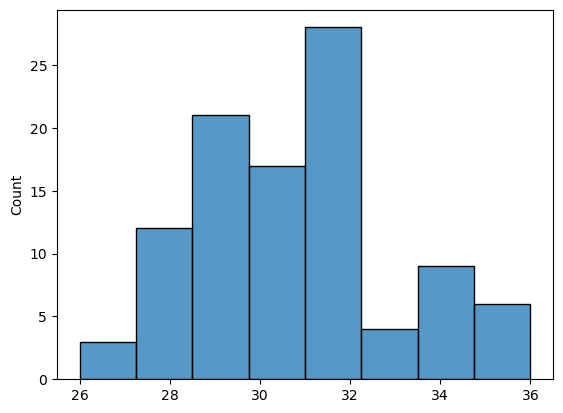

Counter({3302: 3, 3341: 2, 3366: 2, 3267: 2, 3269: 2, 3236: 2, 3338: 2, 3396: 2, 3372: 2, 3331: 2, 3373: 2, 3376: 2, 3315: 2, 3313: 2, 3318: 2, 3361: 2, 3385: 2, 3265: 2, 3438: 1, 3186: 1, 3314: 1, 3132: 1, 3246: 1, 3398: 1, 3292: 1, 3364: 1, 3384: 1, 3249: 1, 3278: 1, 3354: 1, 3235: 1, 3352: 1, 3264: 1, 3256: 1, 3271: 1, 3388: 1, 3306: 1, 3312: 1, 3322: 1, 3296: 1, 3324: 1, 3359: 1, 3201: 1, 3403: 1, 3422: 1, 3521: 1, 3449: 1, 3300: 1, 3242: 1, 3317: 1, 3401: 1, 3308: 1, 3305: 1, 3355: 1, 3225: 1, 3378: 1, 3328: 1, 3379: 1, 3494: 1, 3274: 1, 3179: 1, 3395: 1, 3383: 1, 3326: 1, 3501: 1, 3399: 1, 3351: 1, 3348: 1, 3190: 1, 3408: 1, 3304: 1, 3260: 1, 3294: 1, 3371: 1, 3310: 1, 3340: 1, 3437: 1, 3337: 1, 3426: 1, 3428: 1, 3349: 1})


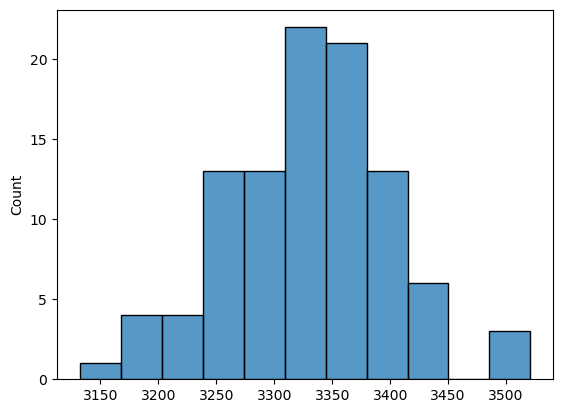

CPU times: total: 266 ms
Wall time: 581 ms


In [20]:
%%time
#Calculamos los parametros 

# Max depth

print(Counter([x.get_depth() for x in model.estimators_]))
sns.histplot([x.get_depth() for x in model.estimators_])
plt.show()

# N Leaves
from collections import Counter
print(Counter([x.get_n_leaves() for x in model.estimators_]))
sns.histplot([x.get_n_leaves() for x in model.estimators_])
plt.show()

In [19]:
%%time
# GridSearch 

model = RandomForestClassifier()

params = {"n_estimators"           : [100, 150], # Numero de arboles
          "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
          "max_depth"              : range(30, 45, 3), # La profundidad máxima del árbol.
          "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split
          "max_leaf_nodes"         : range(3900, 4300, 50), # Maximo de nodos hoja del arbol
          "min_samples_split"      : [10, 15, 20, None], # El número mínimo de muestras requeridas para llegar a nodo hoja.
         } 

scorers = ["accuracy", "roc_auc"]

grid_solver = GridSearchCV(estimator  = model     , 
                           param_grid = params    , 
                           scoring    = scorers   ,
                           cv         = 5         ,
                           refit      = "roc_auc" ,
                           n_jobs     = -1        ,
                           verbose    = 3)

model_result = grid_solver.fit(X, y.ravel())

print(model_result.cv_results_["mean_test_roc_auc"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=15, n_estimators=150; accuracy: (test=0.714) roc_auc: (test=0.912) total time=  17.0s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=4100, min_samples_split=None, n_estimators=150; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=4150, min_samples_split=10, n_estimators=150; accuracy: (test=0.715) roc_auc: (test=0.910) total time=  18.2s
[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, max_leaf_nodes=3950, min_samples_split=10, n_estimators=100; accuracy: (test=0.958) roc_auc: (test=0.997) total time=  14.1s
[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, max_leaf_nodes=4050, min_samples_split=20, n_estimators=150; accuracy: (test=0.925) roc_auc: (test=0.996) total time=  20.0s
[C

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2400 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.8/site-packages/sklearn/utils/

nan
nan
****************************************************************************************************
0.9673065170579591
{'criterion': 'entropy', 'max_depth': 36, 'max_features': 'sqrt', 'max_leaf_nodes': 4050, 'min_samples_split': 15, 'n_estimators': 150}
CPU times: user 1min 13s, sys: 11.5 s, total: 1min 24s
Wall time: 31min 46s


In [21]:
import pickle

In [23]:
best_model = RandomForestClassifier(**model_result.best_params_)
model.fit(X, y.ravel())

with open("rfc_model_final.pkl", "bw") as file:
    pickle.dump(model, file)

[CV 5/5] END criterion=entropy, max_depth=39, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=None, n_estimators=100; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=39, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=None, n_estimators=150; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=39, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=None, n_estimators=150; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=39, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=None, n_estimators=150; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=39, max_features=sqrt, max_leaf_nodes=4000, min_samples_split=None, n_estimators=150; accuracy: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=39, max_features=s

In [ ]:
import pickle


In [ ]:
#Guardamos el mejor modelo resultante en un archivo pickle
best_model = RandomForestClassifier(**model_result.best_params_)
model.fit(X, y.ravel())

with open("rfc_model_final.pkl", "bw") as file:
    pickle.dump(model, file)

El modelo de Random Forest que mejores paramétro da es:
* criterion: gini
* max_depht: 36
* max_features: sqrt
* max_leave_node: 3950
* min_sample_spli: 10
* n_estimator: 150
